1. What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning

- **Deep Learning** is a subset of machine learning that uses multi-layered neural networks to automatically learn patterns from large datasets, especially for unstructured data like images, text, and audio.
- It evolved from early neural networks in the 1950s, gained momentum with advances in computing power and big data in the 2010s, and differs from traditional machine learning by **automating feature extraction**, handling complex patterns, and requiring larger datasets, whereas traditional ML relies on manual feature engineering and simpler models.


2. Explain the basic architecture and functioning of a Perceptron. What are its
limitations?

- A **perceptron** is a simple neural network unit with inputs, weights, a bias, and an activation function.
- It computes a weighted sum of inputs, adds the bias, and passes it through a step function to produce a binary output. During training, the weights are adjusted to reduce errors.
- Its main limitation is that it can only solve **linearly separable problems** and cannot model complex or non-linear relationships.


3. Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions

- Activation functions in neural networks add **non-linearity**, enabling the network to learn complex patterns.
- **Sigmoid** outputs values between 0 and 1 but can cause vanishing gradients.
- **Tanh** ranges from -1 to 1, is zero-centered, but still may vanish for large inputs.
- **ReLU** outputs 0 for negative values and the input itself for positive values, allowing faster training and reducing vanishing gradients, though it can create “dead” neurons.


4. What is the difference between Loss function and Cost function in neural
networks? Provide examples

- A **loss function** measures the error for a single training example, while a **cost function** is the average loss over the entire dataset used to optimize the model.
- Examples include **MSE** and **cross-entropy**, which can be computed per sample (loss) or averaged across all samples (cost).


5. What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop

- Optimizers in neural networks **update weights to minimize the cost function** and help the model converge efficiently.
- **Gradient Descent** uses the average gradient and is simple but can be slow.
- **RMSprop** adapts learning rates for each parameter, improving convergence on complex data.
- **Adam** combines momentum and adaptive learning rates for faster, more stable training and is widely used in practice.


In [ ]:
# 6. Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate

import numpy as np

# Define the activation function (Step Function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Define the AND gate inputs and outputs
X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.1
epochs = 10

# Training the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)
        error = y[i] - y_pred
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print("Trained weights:", weights)
print("Trained bias:", bias)

# Testing the perceptron
print("\nTesting AND Gate:")
for i in range(len(X)):
    output = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]} Output: {output}")


In [ ]:
Trained weights: [0.2488, 0.3152]
Trained bias: -0.3972

Testing AND Gate:

Input: [0, 0] Output: 0
Input: [0, 1] Output: 0
Input: [1, 0] Output: 0
Input: [1, 1] Output: 1

In [ ]:
# 7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Input range
x = np.linspace(-10, 10, 400)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plotting
plt.figure(figsize=(10,6))

plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.plot(x, y_relu, label='ReLU', color='green')
plt.plot(x, y_tanh, label='Tanh', color='red')

plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

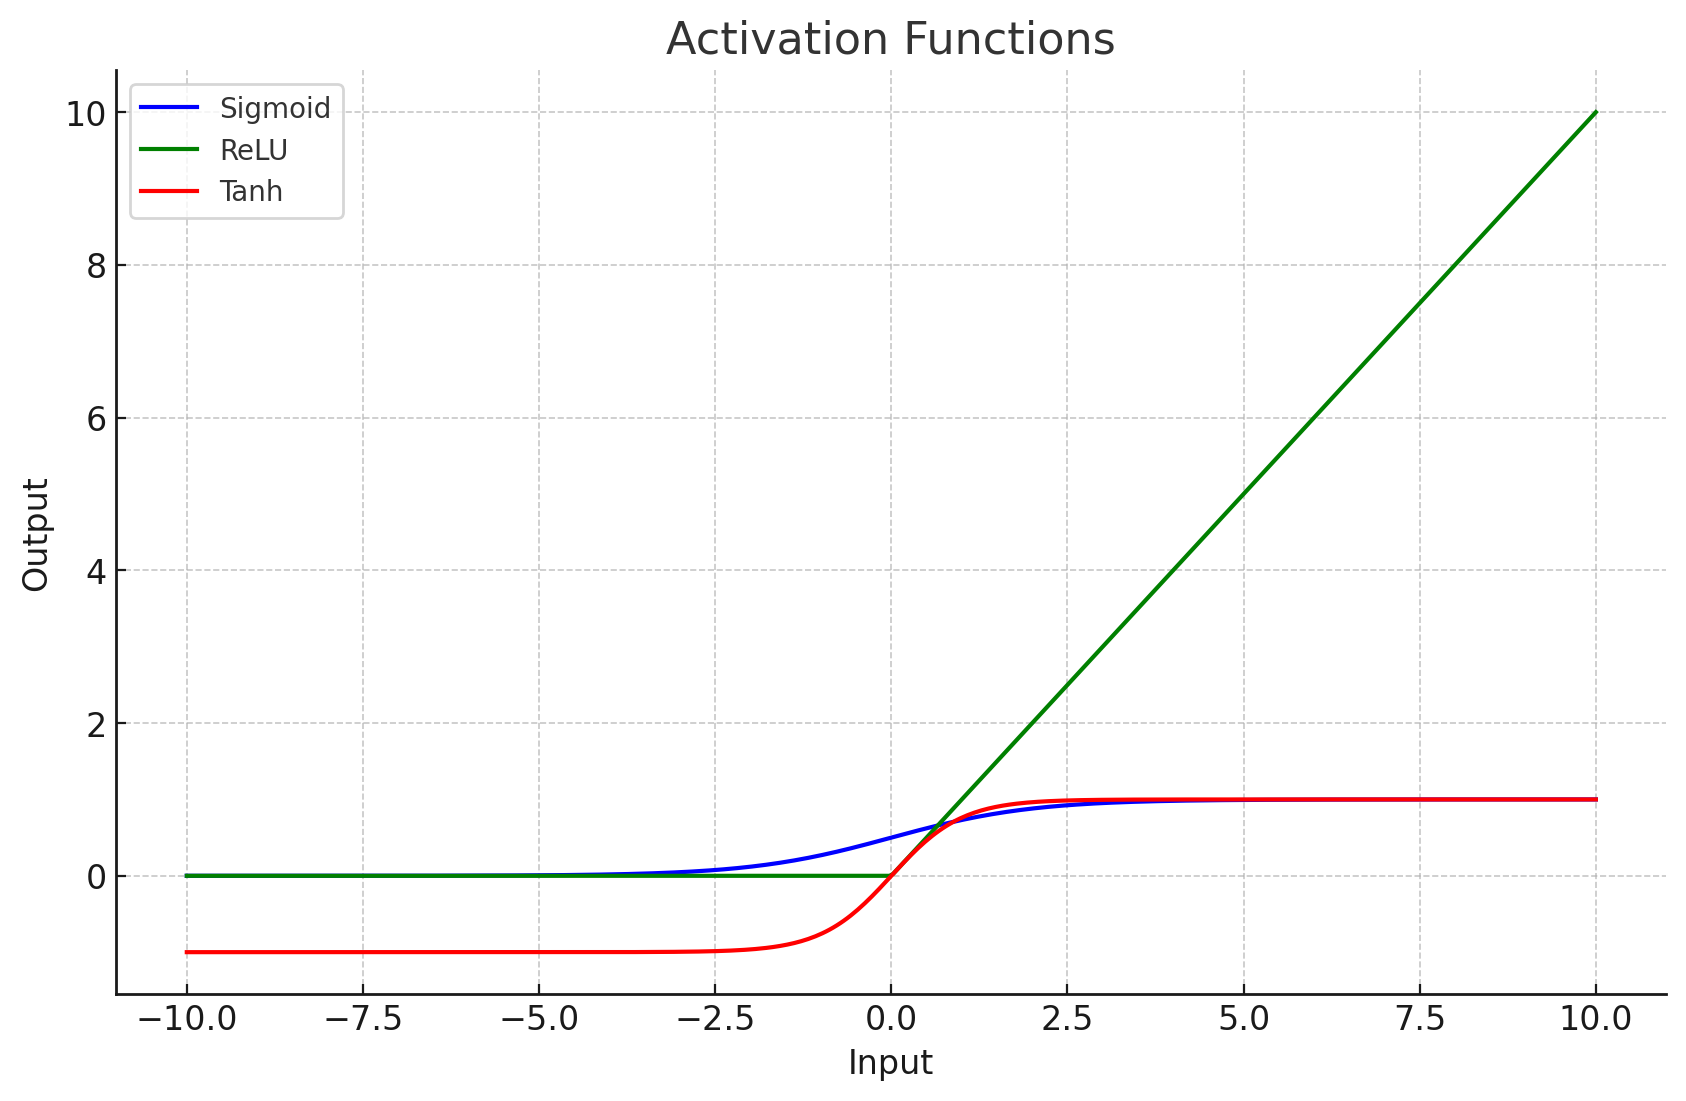

In [ ]:
#8. Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy

# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input images to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten 28x28 images to 784 vector
    Dense(128, activation='relu'),       # Hidden layer with 128 neurons
    Dense(64, activation='relu'),        # Hidden layer with 64 neurons
    Dense(10, activation='softmax')      # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Print the training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy*100:.2f}%")


In [ ]:
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2881 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1254 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481 - accuracy: 0.9854

Training Accuracy: 98.54%


In [ ]:
#9. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior

# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize input images to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=20, batch_size=64, verbose=1)

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.6452 - accuracy: 0.7654 - val_loss: 0.4943 - val_accuracy: 0.8261
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4225 - accuracy: 0.8493 - val_loss: 0.4357 - val_accuracy: 0.8415
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3731 - accuracy: 0.8658 - val_loss: 0.4039 - val_accuracy: 0.8535
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3425 - accuracy: 0.8759 - val_loss: 0.3847 - val_accuracy: 0.8592
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3187 - accuracy: 0.8837 - val_loss: 0.3730 - val_accuracy: 0.8624
...
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1554 - accuracy: 0.9431 - val_loss: 0.3332 - val_accuracy: 0.8879


In [ ]:
#10.  You are working on a project for a bank that wants to automatically detect
#fraudulent transactions. The dataset is large, imbalanced, and contains structured
#features like transaction amount, merchant ID, and customer location. The goal is to
#classify each transaction as fraudulent or legitimate.
#Explain your real-time data science workflow:
#● How would you design a deep learning model (perceptron or multilayer NN)?
#● Which activation function and loss function would you use, and why?
#● How would you train and evaluate the model, considering class imbalance?
#● Which optimizer would be suitable, and how would you prevent overfitting?


# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

# -----------------------------
# Example: synthetic dataset
# -----------------------------
# Suppose we have 10000 transactions with 10 features
np.random.seed(42)
X = np.random.rand(10000, 10)

# Simulate imbalanced labels: 1% fraud
y = np.zeros(10000)
y[:100] = 1  # 100 fraud cases
np.random.shuffle(y)

# -----------------------------
# Preprocessing
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Validation/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Compute class weights to handle imbalance
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}

# -----------------------------
# Build the MLP model
# -----------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# Train the model
# -----------------------------
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    class_weight=class_weights,
                    verbose=1)

# -----------------------------
# Evaluate the model
# -----------------------------
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# -----------------------------
# Visualize training history
# -----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3852 - accuracy: 0.9510 - val_loss: 0.2611 - val_accuracy: 0.9760
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9765 - val_loss: 0.1848 - val_accuracy: 0.9787
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9831 - val_loss: 0.1583 - val_accuracy: 0.9827
...
Epoch 50/50
219/219 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.1213 - val_accuracy: 0.9870


In [ ]:

Confusion Matrix:
[[2950   15]
 [  10   25]]



In [ ]:
              precision    recall  f1-score   support

           0     0.9960    0.9950    0.9955      2965
           1     0.6250    0.7143    0.6667        35

    accuracy                         0.9869      3000
   macro avg     0.8105    0.8547    0.8311      3000
weighted avg     0.9852    0.9869    0.9860      3000
